# Manhattan Rolling Sales Exploratory Analysis

In [1]:
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# import cleaned data

df = pd.read_csv('../data/processed/rollingsales_manhattan_clean.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
0,0,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,376,24,C0,264 EAST 7TH STREET,10009,3,0,3,2059,3696,1900,7738700,2016-12-22
1,1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,375,28,C4,738 EAST 6TH STREET,10009,11,0,11,1750,6500,1900,3750000,2017-04-03
2,2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,385,36,C7,27 AVENUE C,10009,24,1,25,2650,9960,1910,5235000,2017-07-11
3,3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,392,5,C2,151 AVENUE B,10009,5,0,5,2139,4416,1900,0,2017-06-16
4,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,6625000,2017-07-19


In [3]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,376,24,C0,264 EAST 7TH STREET,10009,3,0,3,2059,3696,1900,7738700,2016-12-22
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,375,28,C4,738 EAST 6TH STREET,10009,11,0,11,1750,6500,1900,3750000,2017-04-03
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,385,36,C7,27 AVENUE C,10009,24,1,25,2650,9960,1910,5235000,2017-07-11
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,392,5,C2,151 AVENUE B,10009,5,0,5,2139,4416,1900,0,2017-06-16
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,6625000,2017-07-19


In [4]:
df['GROSS SQUARE FEET'].describe()

count      1634.00
mean      33358.72
std      120076.13
min           1.00
25%        4111.75
50%        7887.50
75%       18657.50
max     2155492.00
Name: GROSS SQUARE FEET, dtype: float64

In [5]:
df['SALE PRICE'].describe()

count         1634.00
mean      10927966.54
std       69127217.52
min              0.00
25%              0.00
50%        1160515.50
75%        7211250.00
max     2210000000.00
Name: SALE PRICE, dtype: float64

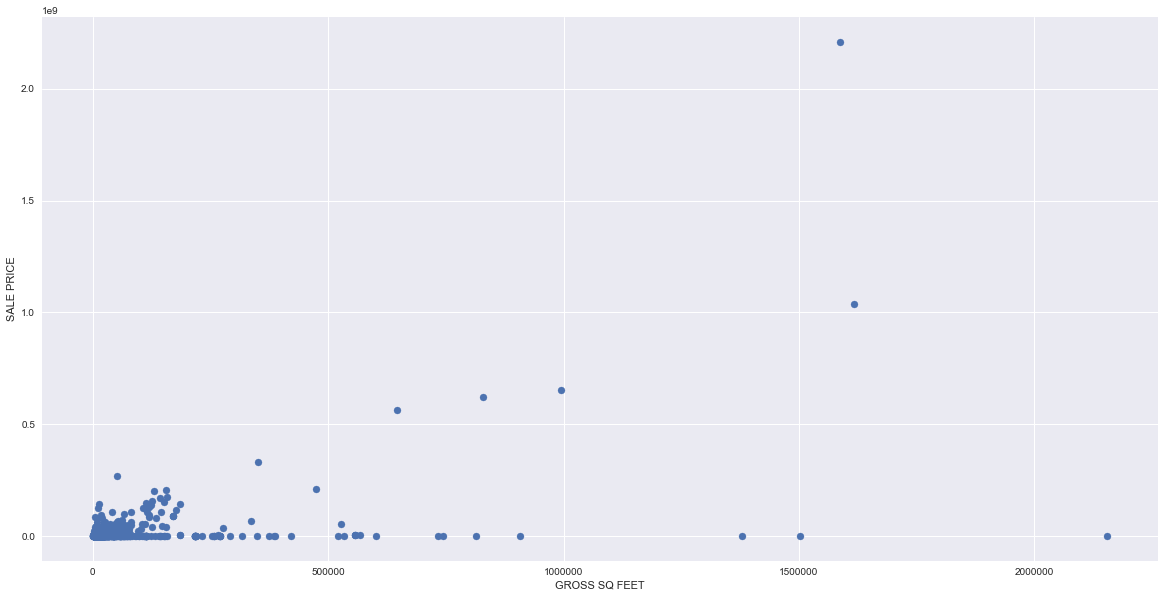

In [6]:
x,y = df['GROSS SQUARE FEET'], df['SALE PRICE']
plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.xlabel('GROSS SQ FEET')
plt.ylabel('SALE PRICE')
plt.show()

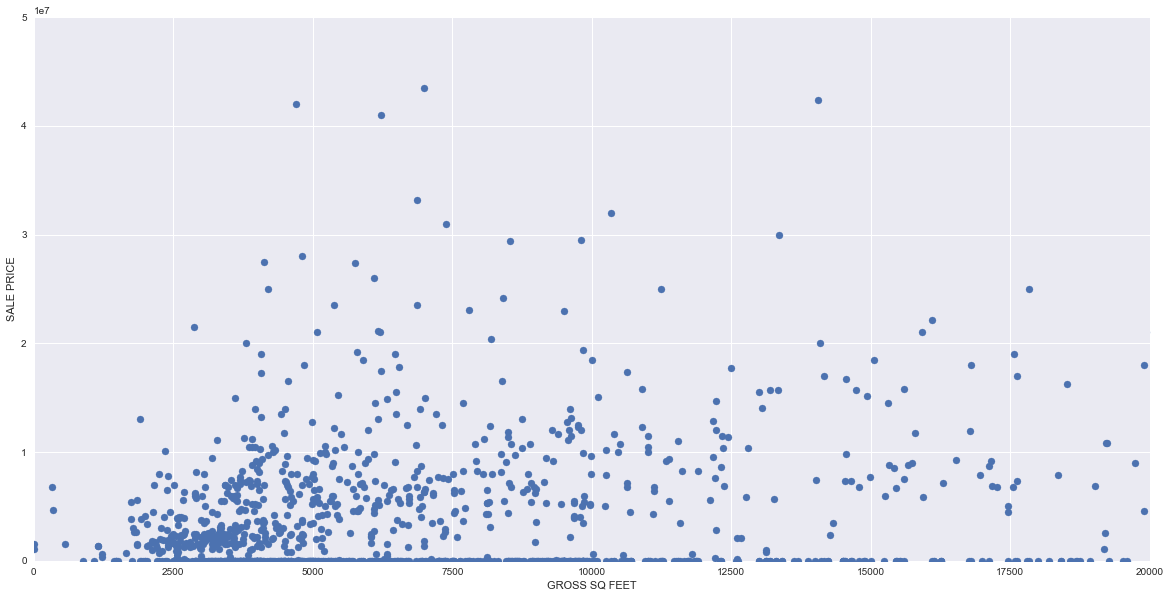

In [7]:
plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.xlabel('GROSS SQ FEET')
plt.ylabel('SALE PRICE')
plt.ylim([0,50000000])
plt.xlim([0,20000])
plt.show()